In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Bai tap 1: Prepare data

In [12]:
def get_column(data, index):
    return [row[index] for row in data]

In [13]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=True).tolist()
    
    tv_data = get_column(data,0)
    radio_data = get_column(data,1)
    newspaper_data = get_column(data,2)
    sales_data = get_column(data,3)
    
    x = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return x, y

In [14]:
X, y = prepare_data(file_name_dataset='./data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.1, 300.5, 78.9]


### Bai tap 2: Stochastic Gradient Descent

In [15]:
def initialize_params():
    w1 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    b = 0
    
    return (w1, w2, w3, b) 

In [16]:
def initialize_params():
    return (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)

In [17]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return x1 * w1 + x2 * w2 + x3 * w3 + b

In [18]:
predict(1, 2, 1, 0, 0.5, 0, 0.5)

1.5

In [44]:
def compute_loss_mse(y_hat, y):
    return (y - y_hat) * (y - y_hat)

In [20]:
compute_loss_mse(1, 0.5)

0.25

In [47]:
def compute_gradient_wi(x1, y, y_hat):
    return 2 * x1 * (y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

In [23]:
compute_gradient_wi(1, 1, 0.5)

1.0

In [24]:
compute_gradient_b(2, 0.5)

3.0

In [26]:
def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

In [28]:
update_weight_wi(1.0, -0.5, 1e-5)

1.000005

In [29]:
update_weight_b(0.5, -1, 1e-5)

0.50001

In [49]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
            
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # Update params
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            # Logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

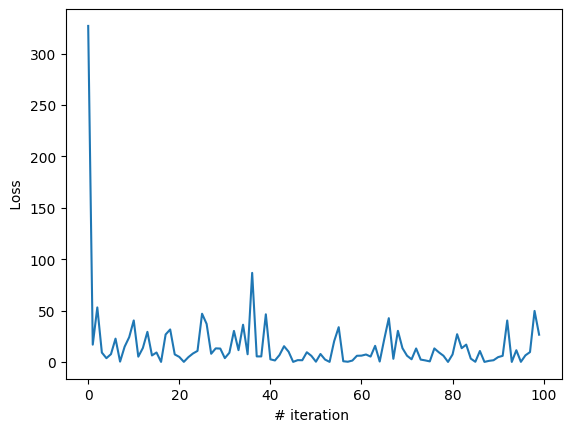

31.338878034644296


In [82]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()
print(losses[9999])

In [51]:
print(w1, w2, w3, b, sep="  -  ")

0.07405984066396477  -  0.15917360263437663  -  0.017561197559948935  -  0.13924260940219846


In [54]:
predict(19.2, 35.9, 51.3, w1, w2, w3, b)

8.176413319549823

In [57]:
import math

def compute_loss_mae(y_hat, y):
    return math.fabs(y - y_hat)

compute_loss_mae(1, 0.5)

0.5

### Bai tap 3: Gradient Descent

In [76]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss_total += compute_loss_mse(y, y_hat)
            
            dw1_total += compute_gradient_wi(x1, y, y_hat)
            dw2_total += compute_gradient_wi(x2, y, y_hat)
            dw3_total += compute_gradient_wi(x3, y, y_hat)
            db_total += compute_gradient_b(y, y_hat)
            
        # Update params
        dw1_total /= N
        dw2_total /= N
        dw3_total /= N
        db_total /= N
        
        w1 = update_weight_wi(w1, dw1_total, lr)
        w2 = update_weight_wi(w2, dw2_total, lr)
        w3 = update_weight_wi(w3, dw3_total, lr)
        b = update_weight_b(b, db_total, lr)
        
        losses.append(loss_total / N)
        
    return w1, w2, w3, b, losses

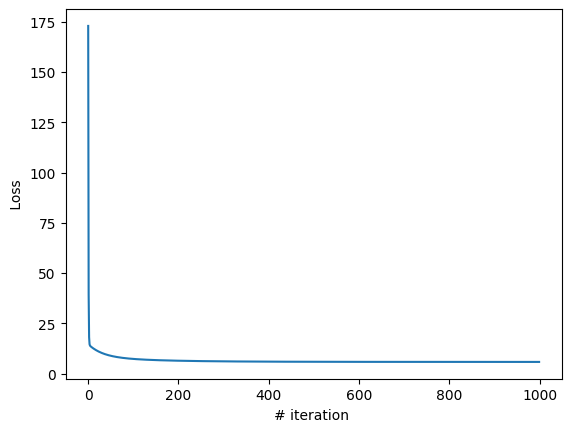

In [70]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, 1000)
plt.plot(losses)
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [73]:
w1, w2, w3

(0.06710990754044266, 0.15756173831487585, 0.029619799386084403)

In [79]:
def compute_gradient_mae_wi(xi, y, y_hat):
    return xi if y_hat > y else -xi

def compute_gradient_mae_b(y, y_hat):
    return 1 if y_hat > y else -1

In [80]:
def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss_total += compute_loss_mae(y, y_hat)
            
            dw1_total += compute_gradient_mae_wi(x1, y, y_hat)
            dw2_total += compute_gradient_mae_wi(x2, y, y_hat)
            dw3_total += compute_gradient_mae_wi(x3, y, y_hat)
            db_total += compute_gradient_mae_b(y, y_hat)
            
        # Update params
        dw1_total /= N
        dw2_total /= N
        dw3_total /= N
        db_total /= N
        
        w1 = update_weight_wi(w1, dw1_total, lr)
        w2 = update_weight_wi(w2, dw2_total, lr)
        w3 = update_weight_wi(w3, dw3_total, lr)
        b = update_weight_b(b, db_total, lr)
        
        losses.append(loss_total / N)
        
    return w1, w2, w3, b, losses

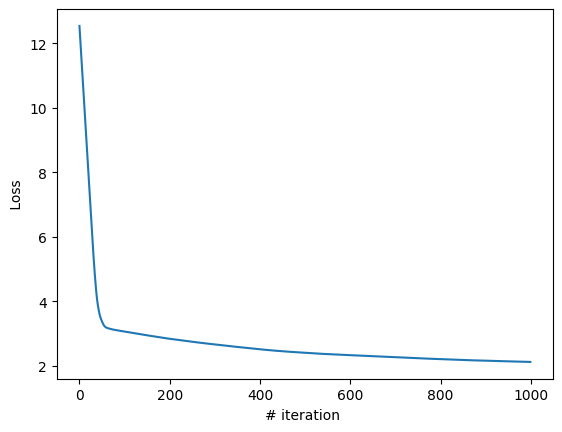

In [81]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples_mae(X, y, 1000)
plt.plot(losses)
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()